# **Loan Default Prediction (Model Prediction)**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

from xgboost import XGBClassifier

## Load The Data

In [2]:
train_df = pd.read_csv("data/train_feat_data.csv")
test_df = pd.read_csv("data/test_feat_data.csv")

train_df.drop(columns=['Unnamed: 0'], inplace=True)
test_df.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
train_df.head(10)

,LoanID,EmploymentType,MaritalStatus,LoanPurpose,Default,age_bin,log_income,loan_to_income,credit_score_bin,employment_tenure,...,has_cosigner,loan_income_dti_interaction,credit_interest_interaction,loan_term_income_interaction,employment_age_interaction,income_creditline_interaction,interest_loan_interaction,debt_burden,employment_credit_interaction,income_education_interaction
0,I38PQUQS96,Full-time,Divorced,Other,0,Senior,11.362044,0.588262,Poor,5+ years,...,1,0.258835,8.977222,0.000419,1.428571,9.975785,0.000301,3.061608,9.249657,12.055186
1,HPSK72WA7R,Full-time,Married,Other,0,Senior,10.828401,2.467481,Poor,1-5 years,...,1,1.677887,7.698020,0.001190,0.217391,10.828401,0.000039,2.915270,8.835065,11.927000
2,C1OZ6DPJ8Y,Unemployed,Divorced,Auto,1,Middle-aged,11.341057,1.534154,Poor,1-5 years,...,0,0.475588,9.164157,0.000285,0.565217,10.242469,0.000164,4.661246,8.271207,12.439661
3,V2KKSFM3UN,Full-time,Married,Business,0,Middle-aged,10.364514,1.412638,Excellent,<1 year,...,0,0.324907,8.566747,0.000757,0.000000,9.265964,0.000158,3.793764,0.000000,10.364514
4,EY08JDHTZP,Unemployed,Divorced,Auto,0,Senior,9.925151,0.447179,Fair,<1 year,...,0,0.326441,8.324053,0.002349,0.133333,8.539004,0.000712,1.607007,7.144407,10.618274
5,A9S62RQ7US,Unemployed,Single,Business,1,Young,11.410882,1.001661,Good,1-5 years,...,1,0.100166,9.702558,0.000266,0.720000,10.717746,0.000251,5.431875,8.776630,11.410882
6,H8GXPAOS71,Unemployed,Single,Home,0,Middle-aged,11.618987,1.592123,Poor,5+ years,...,1,0.254740,9.011791,0.000108,2.105263,11.618987,0.000108,5.253107,10.443513,12.312129
7,0HGZQKJ36W,Full-time,Married,Home,0,Senior,11.750390,1.226408,Poor,5+ years,...,1,0.527355,8.373011,0.000473,1.196429,10.364119,0.000052,3.188199,9.093273,13.136678
8,1R0N3LGNRJ,Self-employed,Divorced,Education,1,Middle-aged,10.646710,2.196205,Excellent,5+ years,...,0,0.439241,9.893406,0.001141,2.305556,10.646710,0.000259,5.575516,11.136660,11.339845
9,CM9L1GTT2P,Self-employed,Married,Other,0,Middle-aged,11.796487,1.720915,Poor,5+ years,...,1,0.567902,8.381190,0.000361,2.850000,10.410215,0.000040,3.879570,9.523763,11.796487


In [4]:
test_df.head(10)

,LoanID,EmploymentType,MaritalStatus,LoanPurpose,age_bin,log_income,loan_to_income,credit_score_bin,employment_tenure,credit_line_category,...,has_cosigner,loan_income_dti_interaction,credit_interest_interaction,loan_term_income_interaction,employment_age_interaction,income_creditline_interaction,interest_loan_interaction,debt_burden,employment_credit_interaction,income_education_interaction
0,7RYZGMKJIR,Full-time,Divorced,Other,Senior,11.787872,0.332690,Excellent,1-5 years,Low,...,0,0.043250,8.495602,0.000182,0.718750,11.094732,0.000139,2.810056,9.129564,11.787872
1,JDL5RH07AM,Self-employed,Single,Business,Senior,11.807928,0.137009,Poor,5+ years,Low,...,1,0.080836,8.475185,0.000447,1.426230,11.114788,0.000706,1.390418,9.683620,11.807928
2,STAL716Y79,Full-time,Single,Other,Middle-aged,11.659706,1.310554,Poor,<1 year,Low,...,1,1.074655,8.040167,0.000414,0.054545,10.561111,0.000036,2.283024,6.335054,12.352849
3,SO0KKJ3IQB,Unemployed,Divorced,Business,Middle-aged,11.461327,0.587438,Poor,1-5 years,Low,...,0,0.452327,8.995340,0.000379,0.413793,11.461327,0.000429,2.957841,8.998260,12.154469
4,T99CWTYDCP,Unemployed,Single,Auto,Senior,11.180636,2.646117,Poor,1-5 years,Low,...,0,1.164291,9.204880,0.000669,0.825397,10.082052,0.000116,4.894899,8.964227,12.566920
5,0SNHFWV4UP,Part-time,Married,Education,Young,10.682675,4.496846,Poor,5+ years,Low,...,0,3.057855,9.074578,0.001376,1.390625,9.584108,0.000101,4.879820,9.481410,12.068952
6,S6ITP6LGYS,Full-time,Divorced,Education,Middle-aged,11.194097,0.442633,Fair,5+ years,Low,...,0,0.296564,8.300479,0.000330,2.050000,10.500963,0.000200,1.660354,10.149762,11.887237
7,A6I7U12IRJ,Unemployed,Single,Business,Senior,10.378199,3.168958,Fair,5+ years,Low,...,1,2.091512,9.015716,0.000373,2.377778,9.279649,0.000126,4.136040,10.038849,11.764470
8,8W6KY50JU4,Full-time,Married,Other,Middle-aged,11.760879,0.090215,Poor,5+ years,Low,...,1,0.028869,9.063523,0.000281,4.375000,11.760879,0.001976,2.006745,10.588880,11.760879
9,THFQ08OLMU,Full-time,Single,Other,Middle-aged,11.812215,1.276249,Poor,<1 year,Low,...,0,0.855087,8.547459,0.000089,0.037736,11.812215,0.000077,3.269432,6.655440,12.505358


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   LoanID                         255347 non-null  object 
 1   EmploymentType                 255347 non-null  object 
 2   MaritalStatus                  255347 non-null  object 
 3   LoanPurpose                    255347 non-null  object 
 4   Default                        255347 non-null  int64  
 5   age_bin                        255347 non-null  object 
 6   log_income                     255347 non-null  float64
 7   loan_to_income                 255347 non-null  float64
 8   credit_score_bin               255347 non-null  object 
 9   employment_tenure              255347 non-null  object 
 10  credit_line_category           255347 non-null  object 
 11  interest_rate_bin              255347 non-null  object 
 12  short_long_term               

In [6]:
train_df.isna().sum()

LoanID                           0
EmploymentType                   0
MaritalStatus                    0
LoanPurpose                      0
Default                          0
age_bin                          0
log_income                       0
loan_to_income                   0
credit_score_bin                 0
employment_tenure                0
credit_line_category             0
interest_rate_bin                0
short_long_term                  0
dti_bin                          0
education_level                  0
has_mortgage                     0
has_dependents                   0
has_cosigner                     0
loan_income_dti_interaction      0
credit_interest_interaction      0
loan_term_income_interaction     0
employment_age_interaction       0
income_creditline_interaction    0
interest_loan_interaction        0
debt_burden                      0
employment_credit_interaction    0
income_education_interaction     0
dtype: int64

In [7]:
categorial_col = [feature for feature in train_df.columns if train_df[feature].dtype == 'object' and feature != 'LoanID']
numerical_col = [feature for feature in train_df.columns if train_df[feature].dtype != 'object']
categorial_col

['EmploymentType',
 'MaritalStatus',
 'LoanPurpose',
 'age_bin',
 'credit_score_bin',
 'employment_tenure',
 'credit_line_category',
 'interest_rate_bin',
 'short_long_term',
 'dti_bin']

In [8]:
train_df[categorial_col]

,EmploymentType,MaritalStatus,LoanPurpose,age_bin,credit_score_bin,employment_tenure,credit_line_category,interest_rate_bin,short_long_term,dti_bin
0,Full-time,Divorced,Other,Senior,Poor,5+ years,Medium,High,Short Term,Medium
1,Full-time,Married,Other,Senior,Poor,1-5 years,Low,Low,Long Term,High
2,Unemployed,Divorced,Auto,Middle-aged,Poor,1-5 years,Low,High,Short Term,Low
3,Full-time,Married,Business,Middle-aged,Excellent,<1 year,Low,Medium,Short Term,Low
4,Unemployed,Divorced,Auto,Senior,Fair,<1 year,Medium,Medium,Long Term,High
...,...,...,...,...,...,...,...,...,...,...
255342,Full-time,Married,Other,Young,Poor,5+ years,Medium,High,Short Term,High
255343,Part-time,Divorced,Home,Middle-aged,Poor,1-5 years,Low,High,Short Term,Low
255344,Self-employed,Married,Auto,Senior,Fair,5+ years,Low,Medium,Long Term,Medium
255345,Part-time,Single,Other,Middle-aged,Excellent,1-5 years,Low,High,Long Term,Medium


In [9]:
for col in categorial_col:
    print(train_df[col].value_counts())
    print('\n')

EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64


MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64


LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64


age_bin
Middle-aged    98601
Senior         98123
Young          58623
Name: count, dtype: int64


credit_score_bin
Poor         129767
Excellent     51695
Fair          41816
Good          32069
Name: count, dtype: int64


employment_tenure
5+ years     127724
1-5 years    102116
<1 year       25507
Name: count, dtype: int64


credit_line_category
Low       191518
Medium     63829
Name: count, dtype: int64


interest_rate_bin
High      166396
Medium     55659
Low        33292
Name: count, dtype: int64


short_long_term
Short Term    153027
Long Term     102320
Name: count, dtype: int64


dti_bin
High      126129
Low        81

## Train / Test Split

In [10]:
X = train_df.drop(columns=['LoanID','Default'], axis=1)
y = train_df['Default']
X_test = test_df.drop(columns=['LoanID'], axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.15, stratify=y, random_state=42)

print("Length of X_train:", len(X_train))
print("Length of y_train:", len(y_train))
print("Length of X_valid:", len(X_valid))
print("Length of y_valid:", len(y_valid))
print("Length of X_test:", len(X_test))

Length of X_train: 217044
Length of y_train: 217044
Length of X_valid: 38303
Length of y_valid: 38303
Length of X_test: 109435


## Pipeline

In [11]:
class FeatureEngineetingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.onehot_encode_columns = ['MaritalStatus', 'EmploymentType', 'LoanPurpose']
        self.ordinal_columns = categorial_col
        self.ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
        self.onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    def fit(self, X, y=None):
        X_transformed = X.copy()

        self.ordinal_encoder.fit(X_transformed[self.ordinal_columns])
        self.onehot_encoder.fit(X_transformed[self.onehot_encode_columns])
        return self
    
    def transform(self, X, y=None):
        X_copy = X.copy()

        to_encode_ordinal = self.ordinal_encoder.transform(X_copy[self.ordinal_columns])
        to_encode_ordinal_df = pd.DataFrame(to_encode_ordinal, columns=[f"ordinal_{col}" for col in self.ordinal_columns], index=X_copy.index)
        X_copy = pd.concat([X_copy, to_encode_ordinal_df], axis=1)

        to_encode_onehot = self.onehot_encoder.transform(X_copy[self.onehot_encode_columns])
        onehot_columns = self.onehot_encoder.get_feature_names_out(self.onehot_encode_columns)
        to_encode_onehot_df = pd.DataFrame(to_encode_onehot, columns=onehot_columns,  index=X_copy.index)
        X_copy = pd.concat([X_copy, to_encode_onehot_df], axis=1)

        to_drop_col = categorial_col + self.onehot_encode_columns
        X_copy.drop(columns=to_drop_col, inplace=True)
        
        return X_copy

## Model Implementation & Prediction

## **Logistic Regression**

In [12]:
pipefinallr = Pipeline(steps=[
    ('feature_engineering', FeatureEngineetingTransformer()),
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(C=1, max_iter=300, penalty='l2', solver='liblinear'))
])

pipefinallr.fit(X_train, y_train)
prediction_data_lr = pipefinallr.predict(X_valid)

train_accuracy_lr = accuracy_score(y_train, pipefinallr.predict(X_train))
test_accuracy_lr = accuracy_score(y_valid, prediction_data_lr)

print("Training accuracy: {:.3f}".format(train_accuracy_lr))
print("Validation accuracy: {:.3f}".format(test_accuracy_lr))

if train_accuracy_lr < test_accuracy_lr:
    print("Underfitting: The model may be too simple for the data.")
elif train_accuracy_lr > test_accuracy_lr:
    print("Overfitting: The model may be overfitting to the training data.")
else:
    print("Good fit: The model seems to generalize well.")

predictions_on_test_set = pipefinallr.predict(X_test)

Training accuracy: 0.884
Validation accuracy: 0.884
Overfitting: The model may be overfitting to the training data.


In [13]:
print("Classification report:", classification_report(y_valid, prediction_data_lr))

Classification report:               precision    recall  f1-score   support

           0       0.89      0.99      0.94     33855
           1       0.48      0.04      0.07      4448

    accuracy                           0.88     38303
   macro avg       0.69      0.52      0.51     38303
weighted avg       0.84      0.88      0.84     38303



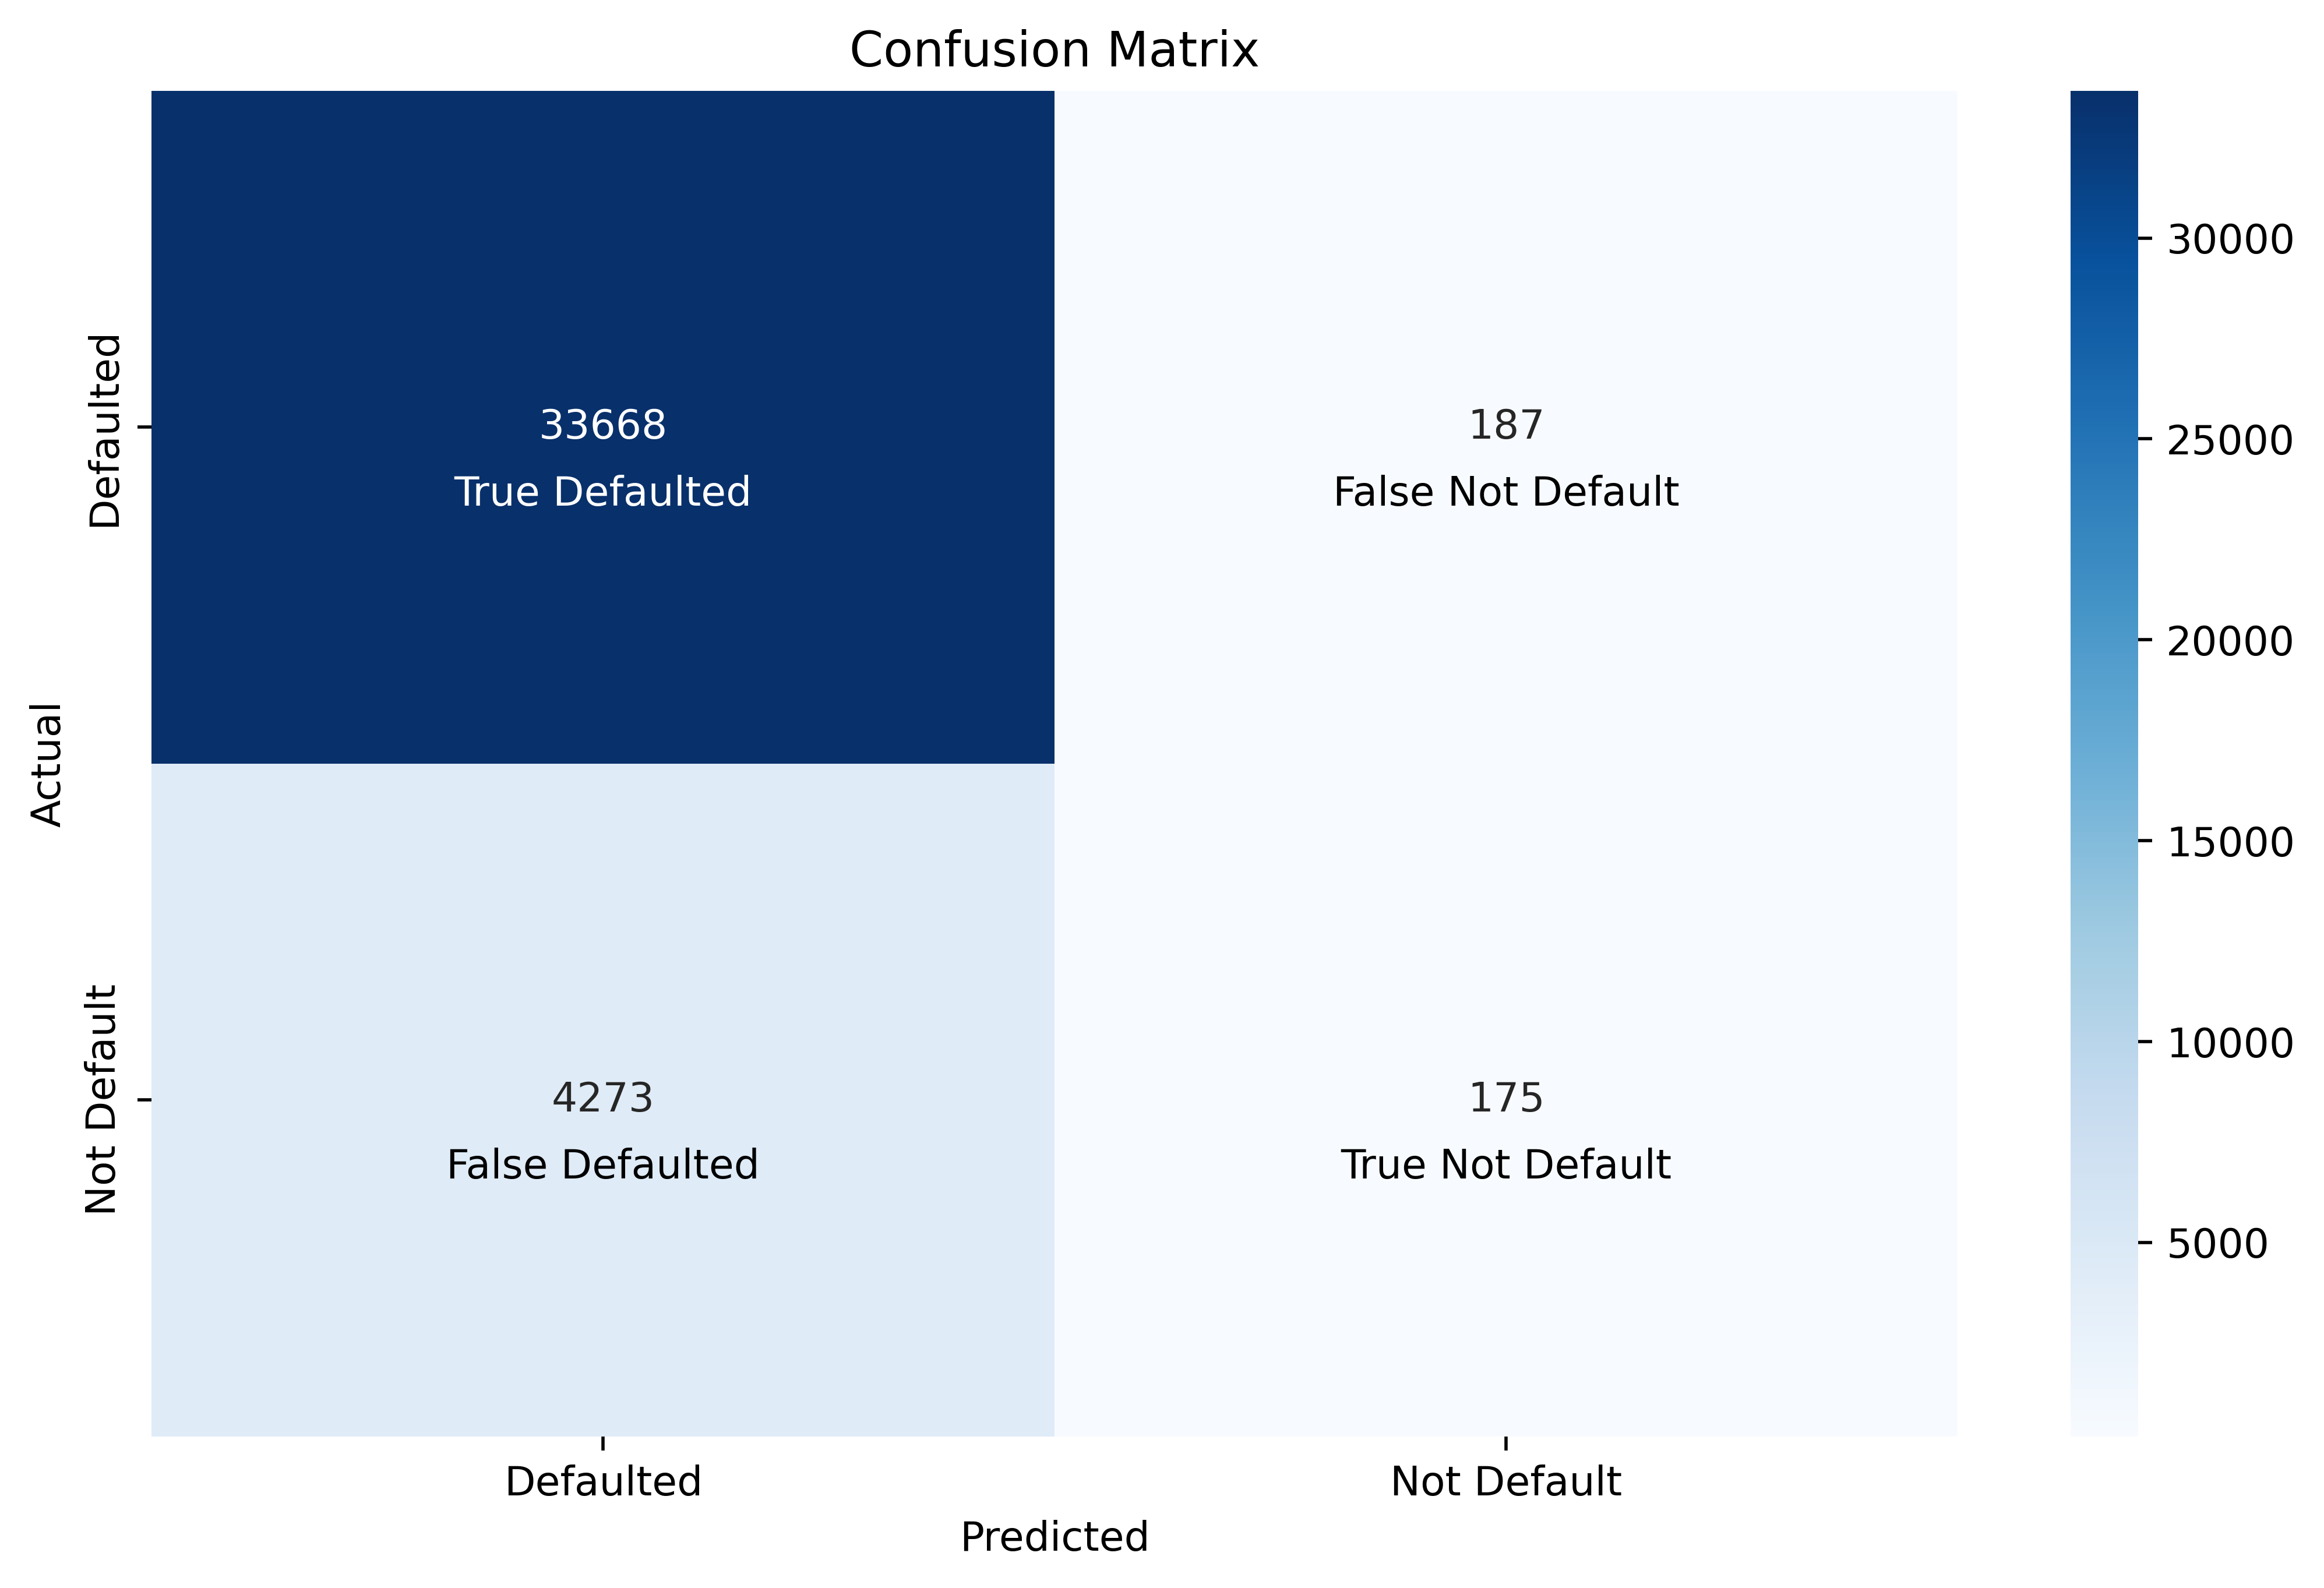

In [14]:
cm = confusion_matrix(y_valid, prediction_data_lr)
plt.figure(figsize=(10, 6), dpi=500)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
             xticklabels=['Defaulted', 'Not Default'], 
             yticklabels=['Defaulted', 'Not Default'])
plt.text(0.5, 0.6, 'True Defaulted', ha='center', va='center', color='white')
plt.text(1.5, 0.6, 'False Not Default', ha='center', va='center', color='black')
plt.text(0.5, 1.6, 'False Defaulted', ha='center', va='center', color='black')
plt.text(1.5, 1.6, 'True Not Default', ha='center', va='center', color='black')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [15]:
predicted_counts = pd.Series(prediction_data_lr).value_counts(normalize=True) * 100
predicted_counts.index = ['Defaulted', 'Not Default']
actual_distribution = {'Defaulted': 12, 'Not Default': 88}
comparison_df = pd.DataFrame({
    'Defaulted': predicted_counts,
    'Not Default': actual_distribution.values()
}, index=actual_distribution.keys())
print("\nPredicted vs Actual Stay Purpose:", comparison_df)


Predicted vs Actual Stay Purpose:              Defaulted  Not Default
Defaulted    99.054904           12
Not Default   0.945096           88


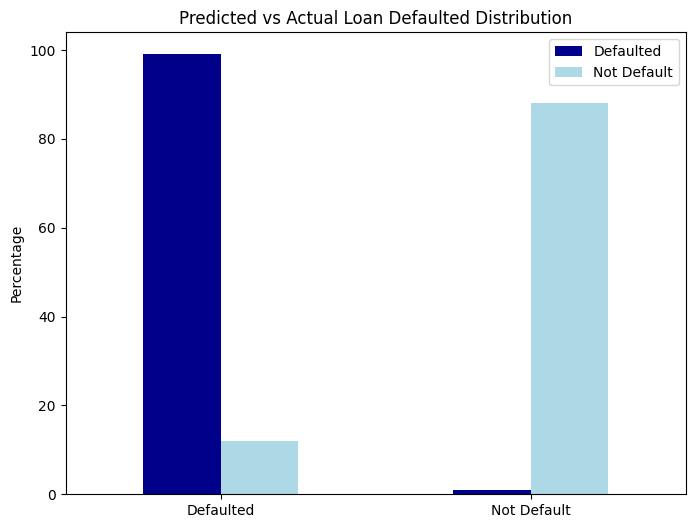

In [16]:
comparison_df.plot(kind='bar', figsize=(8, 6), color=['#00008B', '#ADD8E6'])
plt.title('Predicted vs Actual Loan Defaulted Distribution')
plt.ylabel('Percentage')
plt.xlabel('') 
plt.xticks(rotation=0)
plt.show()

Validation Accuracy: 0.884
ROC AUC Score on Validation Set: 0.719


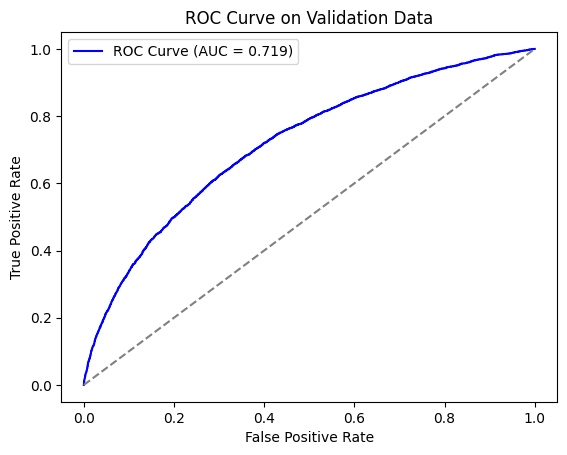

In [17]:
validation_accuracy = accuracy_score(y_valid, prediction_data_lr)
print("Validation Accuracy: {:.3f}".format(validation_accuracy))

predicted_probabilities = pipefinallr.predict_proba(X_valid)[:, 1]  
roc_auc = roc_auc_score(y_valid, predicted_probabilities)
print("ROC AUC Score on Validation Set: {:.3f}".format(roc_auc))

fpr, tpr, _ = roc_curve(y_valid, predicted_probabilities)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Validation Data')
plt.legend()
plt.show()

## **Decision Tree Classification**

In [18]:
pipefinaldt = Pipeline(steps=[
    ('feature_engineering', FeatureEngineetingTransformer()),
    ('scaler', StandardScaler()), 
    ('dt', DecisionTreeClassifier(random_state=42))
])

pipefinaldt.fit(X_train, y_train)
prediction_data_dt = pipefinaldt.predict(X_valid)

train_accuracy_dt = accuracy_score(y_train, pipefinaldt.predict(X_train))
test_accuracy_dt = accuracy_score(y_valid, prediction_data_dt)

print("Training accuracy: {:.3f}".format(train_accuracy_dt))
print("Validation accuracy: {:.3f}".format(test_accuracy_dt))

if train_accuracy_dt < test_accuracy_dt:
    print("Underfitting: The model may be too simple for the data.")
elif train_accuracy_dt > test_accuracy_dt:
    print("Overfitting: The model may be overfitting to the training data.")
else:
    print("Good fit: The model seems to generalize well.")

Training accuracy: 1.000
Validation accuracy: 0.802
Overfitting: The model may be overfitting to the training data.


In [19]:
print("Classification report:", classification_report(y_valid, prediction_data_dt))

Classification report:               precision    recall  f1-score   support

           0       0.90      0.88      0.89     33855
           1       0.19      0.22      0.20      4448

    accuracy                           0.80     38303
   macro avg       0.54      0.55      0.55     38303
weighted avg       0.81      0.80      0.81     38303



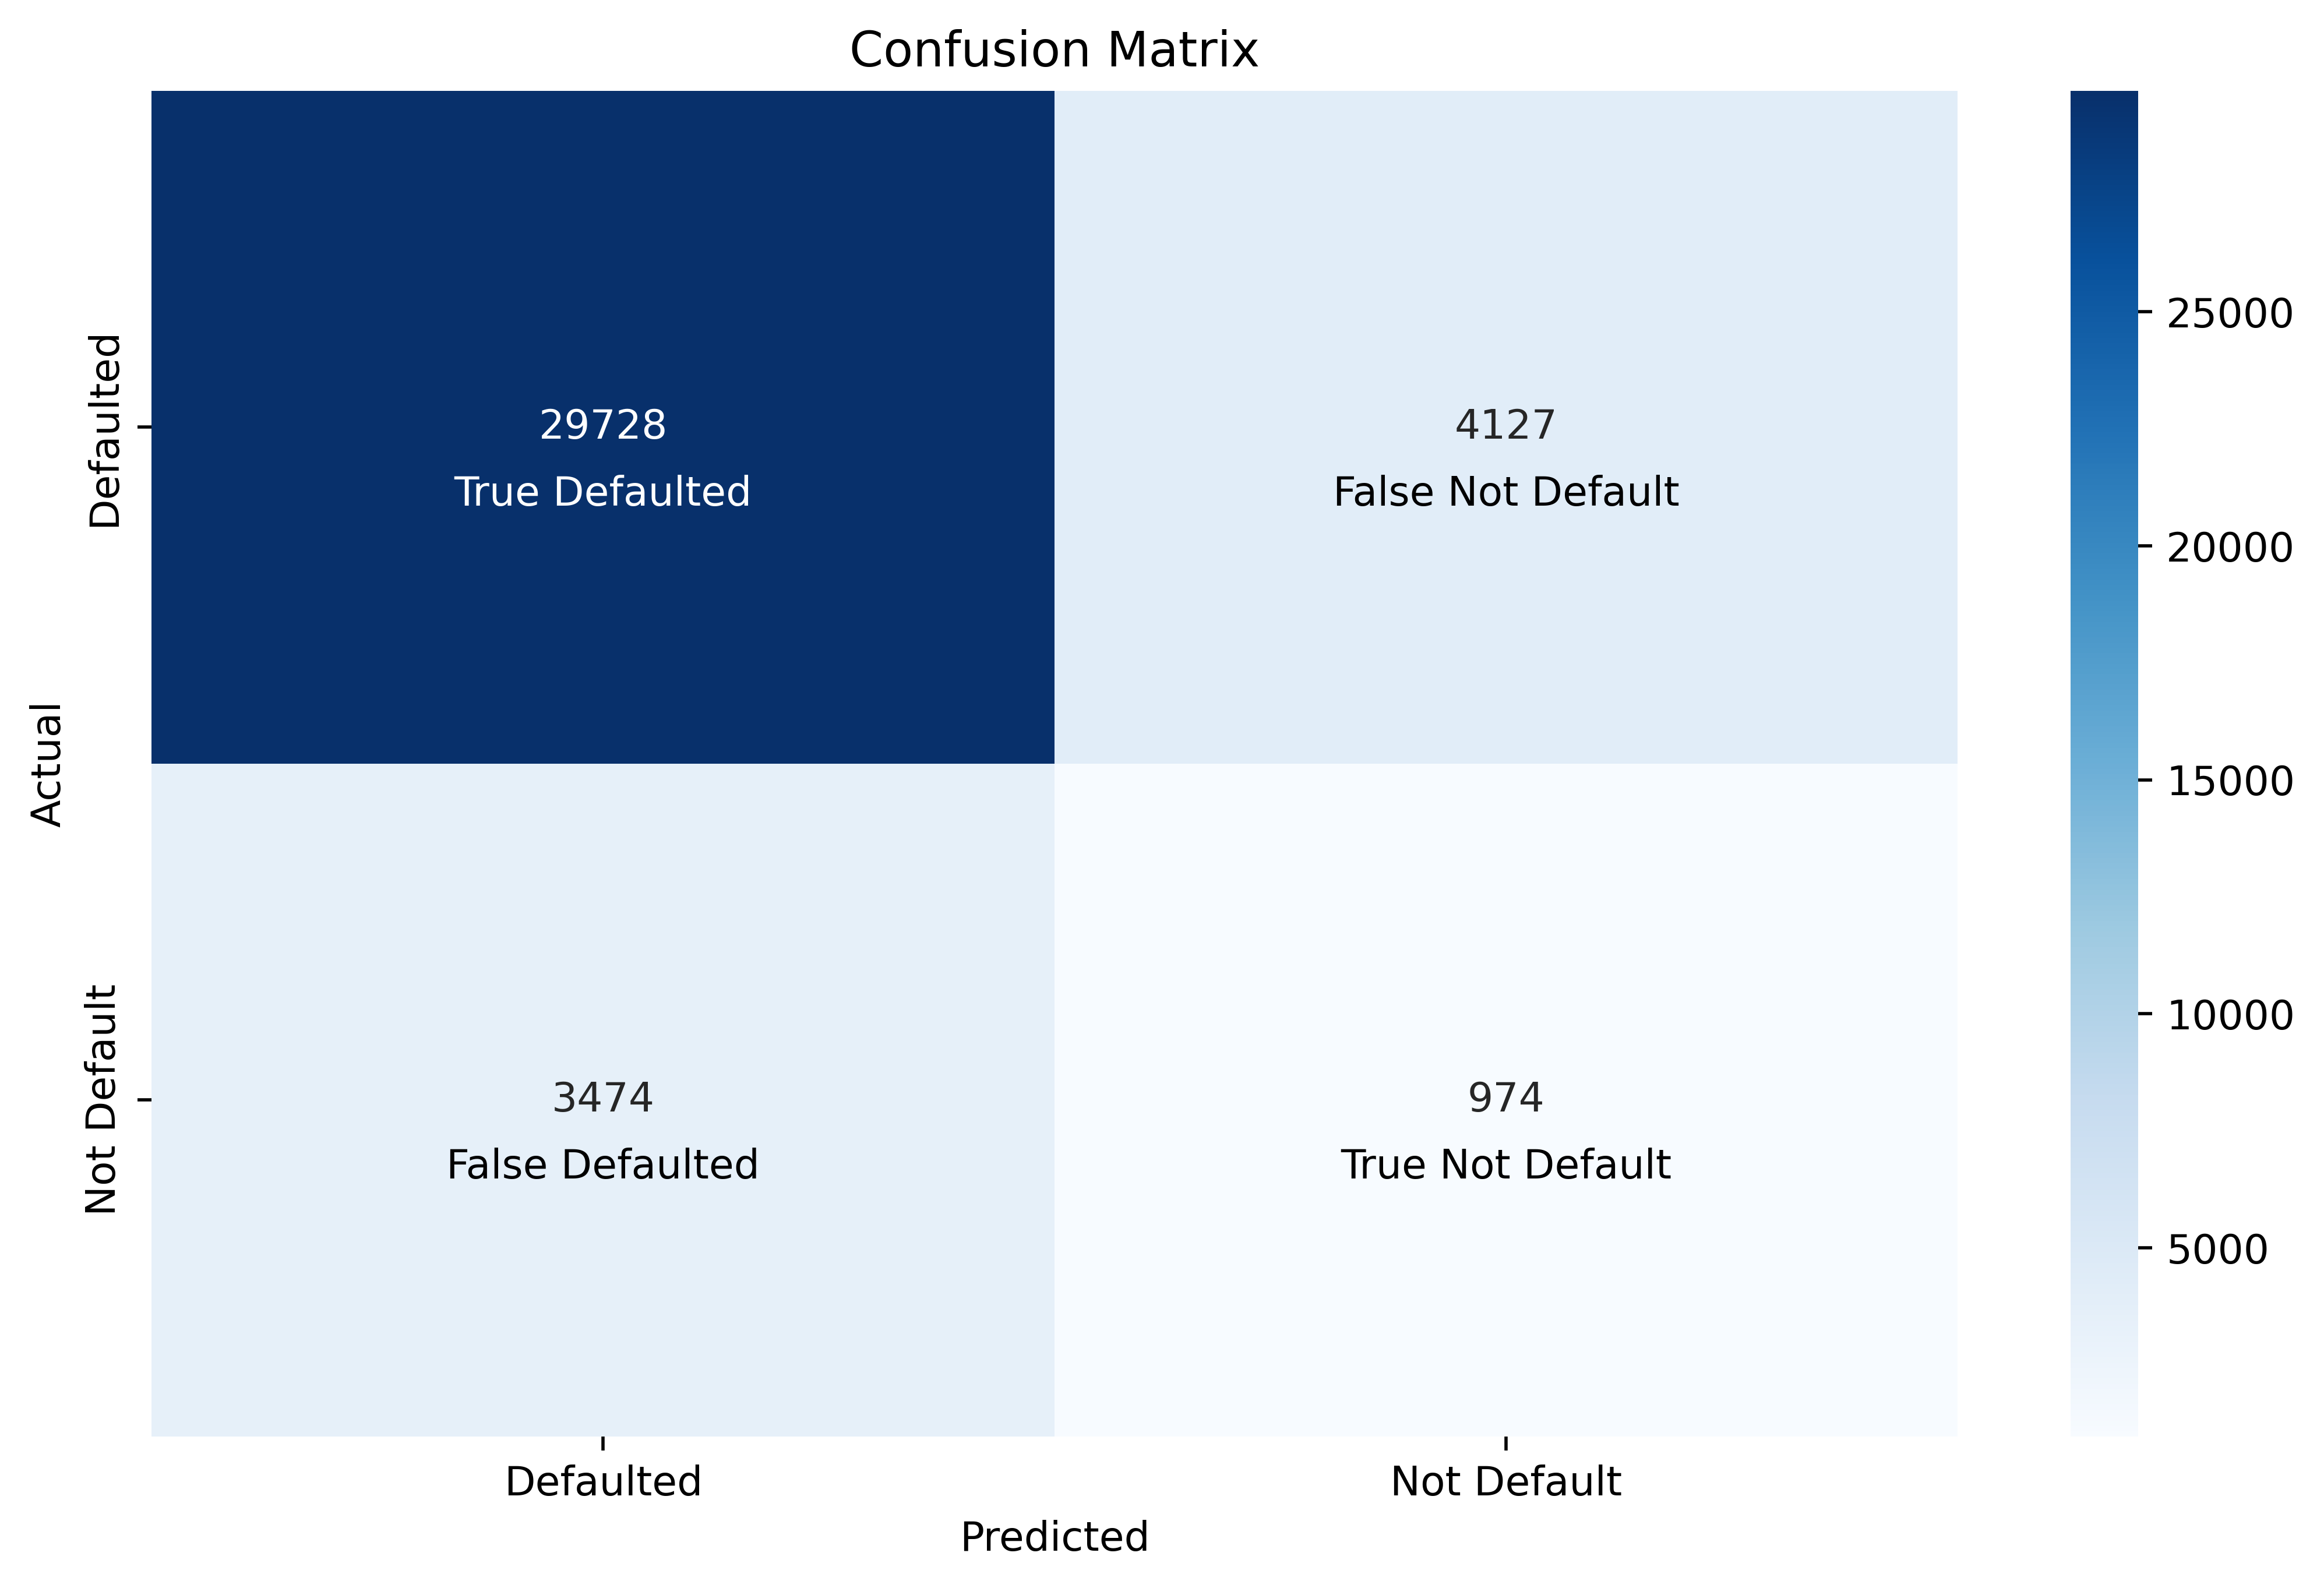

In [20]:
cm = confusion_matrix(y_valid, prediction_data_dt)
plt.figure(figsize=(10, 6), dpi=500)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
             xticklabels=['Defaulted', 'Not Default'], 
             yticklabels=['Defaulted', 'Not Default'])
plt.text(0.5, 0.6, 'True Defaulted', ha='center', va='center', color='white')
plt.text(1.5, 0.6, 'False Not Default', ha='center', va='center', color='black')
plt.text(0.5, 1.6, 'False Defaulted', ha='center', va='center', color='black')
plt.text(1.5, 1.6, 'True Not Default', ha='center', va='center', color='black')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [21]:
predicted_counts = pd.Series(prediction_data_dt).value_counts(normalize=True) * 100
predicted_counts.index = ['Defaulted', 'Not Default']
actual_distribution = {'Defaulted': 12, 'Not Default': 88}
comparison_df = pd.DataFrame({
    'Defaulted': predicted_counts,
    'Not Default': actual_distribution.values()
}, index=actual_distribution.keys())
print("\nPredicted vs Actual Stay Purpose:", comparison_df)


Predicted vs Actual Stay Purpose:              Defaulted  Not Default
Defaulted    86.682505           12
Not Default  13.317495           88


Validation Accuracy: 0.802
ROC AUC Score on Validation Set: 0.549


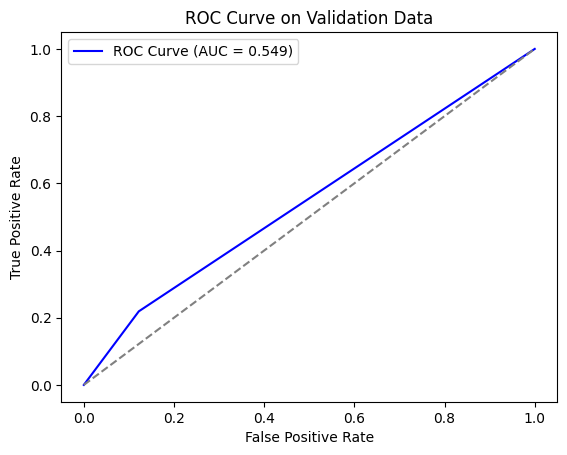

In [22]:
validation_accuracy = accuracy_score(y_valid, prediction_data_dt)
print("Validation Accuracy: {:.3f}".format(validation_accuracy))

predicted_probabilities = pipefinaldt.predict_proba(X_valid)[:, 1]  
roc_auc = roc_auc_score(y_valid, predicted_probabilities)
print("ROC AUC Score on Validation Set: {:.3f}".format(roc_auc))

fpr, tpr, _ = roc_curve(y_valid, predicted_probabilities)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Validation Data')
plt.legend()
plt.show()

## **Random Forest Classification**

In [23]:
pipefinalrf = Pipeline(steps=[
    ('feature_engineering', FeatureEngineetingTransformer()),
    ('scaler', StandardScaler()),
    ('rfc', RandomForestClassifier(random_state=42))    
])

pipefinalrf.fit(X_train, y_train)
prediction_data_rf = pipefinalrf.predict(X_valid)

train_accuracy_rf = accuracy_score(y_train, pipefinalrf.predict(X_train))
test_accuracy_rf = accuracy_score(y_valid, prediction_data_rf)

print("Training accuracy: {:.3f}".format(train_accuracy_rf))
print("Test accuracy: {:.3f}".format(test_accuracy_rf))

if train_accuracy_rf < test_accuracy_rf:
    print("Underfitting: The model may be too simple for the data.")
elif train_accuracy_rf > test_accuracy_rf:
    print("Overfitting: The model may be overfitting to the training data.")
else:
    print("Good fit: The model seems to generalize well.")

predictions_on_test_set_rf = pipefinalrf.predict(X_test)

Training accuracy: 1.000
Test accuracy: 0.886
Overfitting: The model may be overfitting to the training data.


In [24]:
print("Classification report:", classification_report(y_valid, prediction_data_rf))

Classification report:               precision    recall  f1-score   support

           0       0.89      1.00      0.94     33855
           1       0.61      0.04      0.08      4448

    accuracy                           0.89     38303
   macro avg       0.75      0.52      0.51     38303
weighted avg       0.86      0.89      0.84     38303



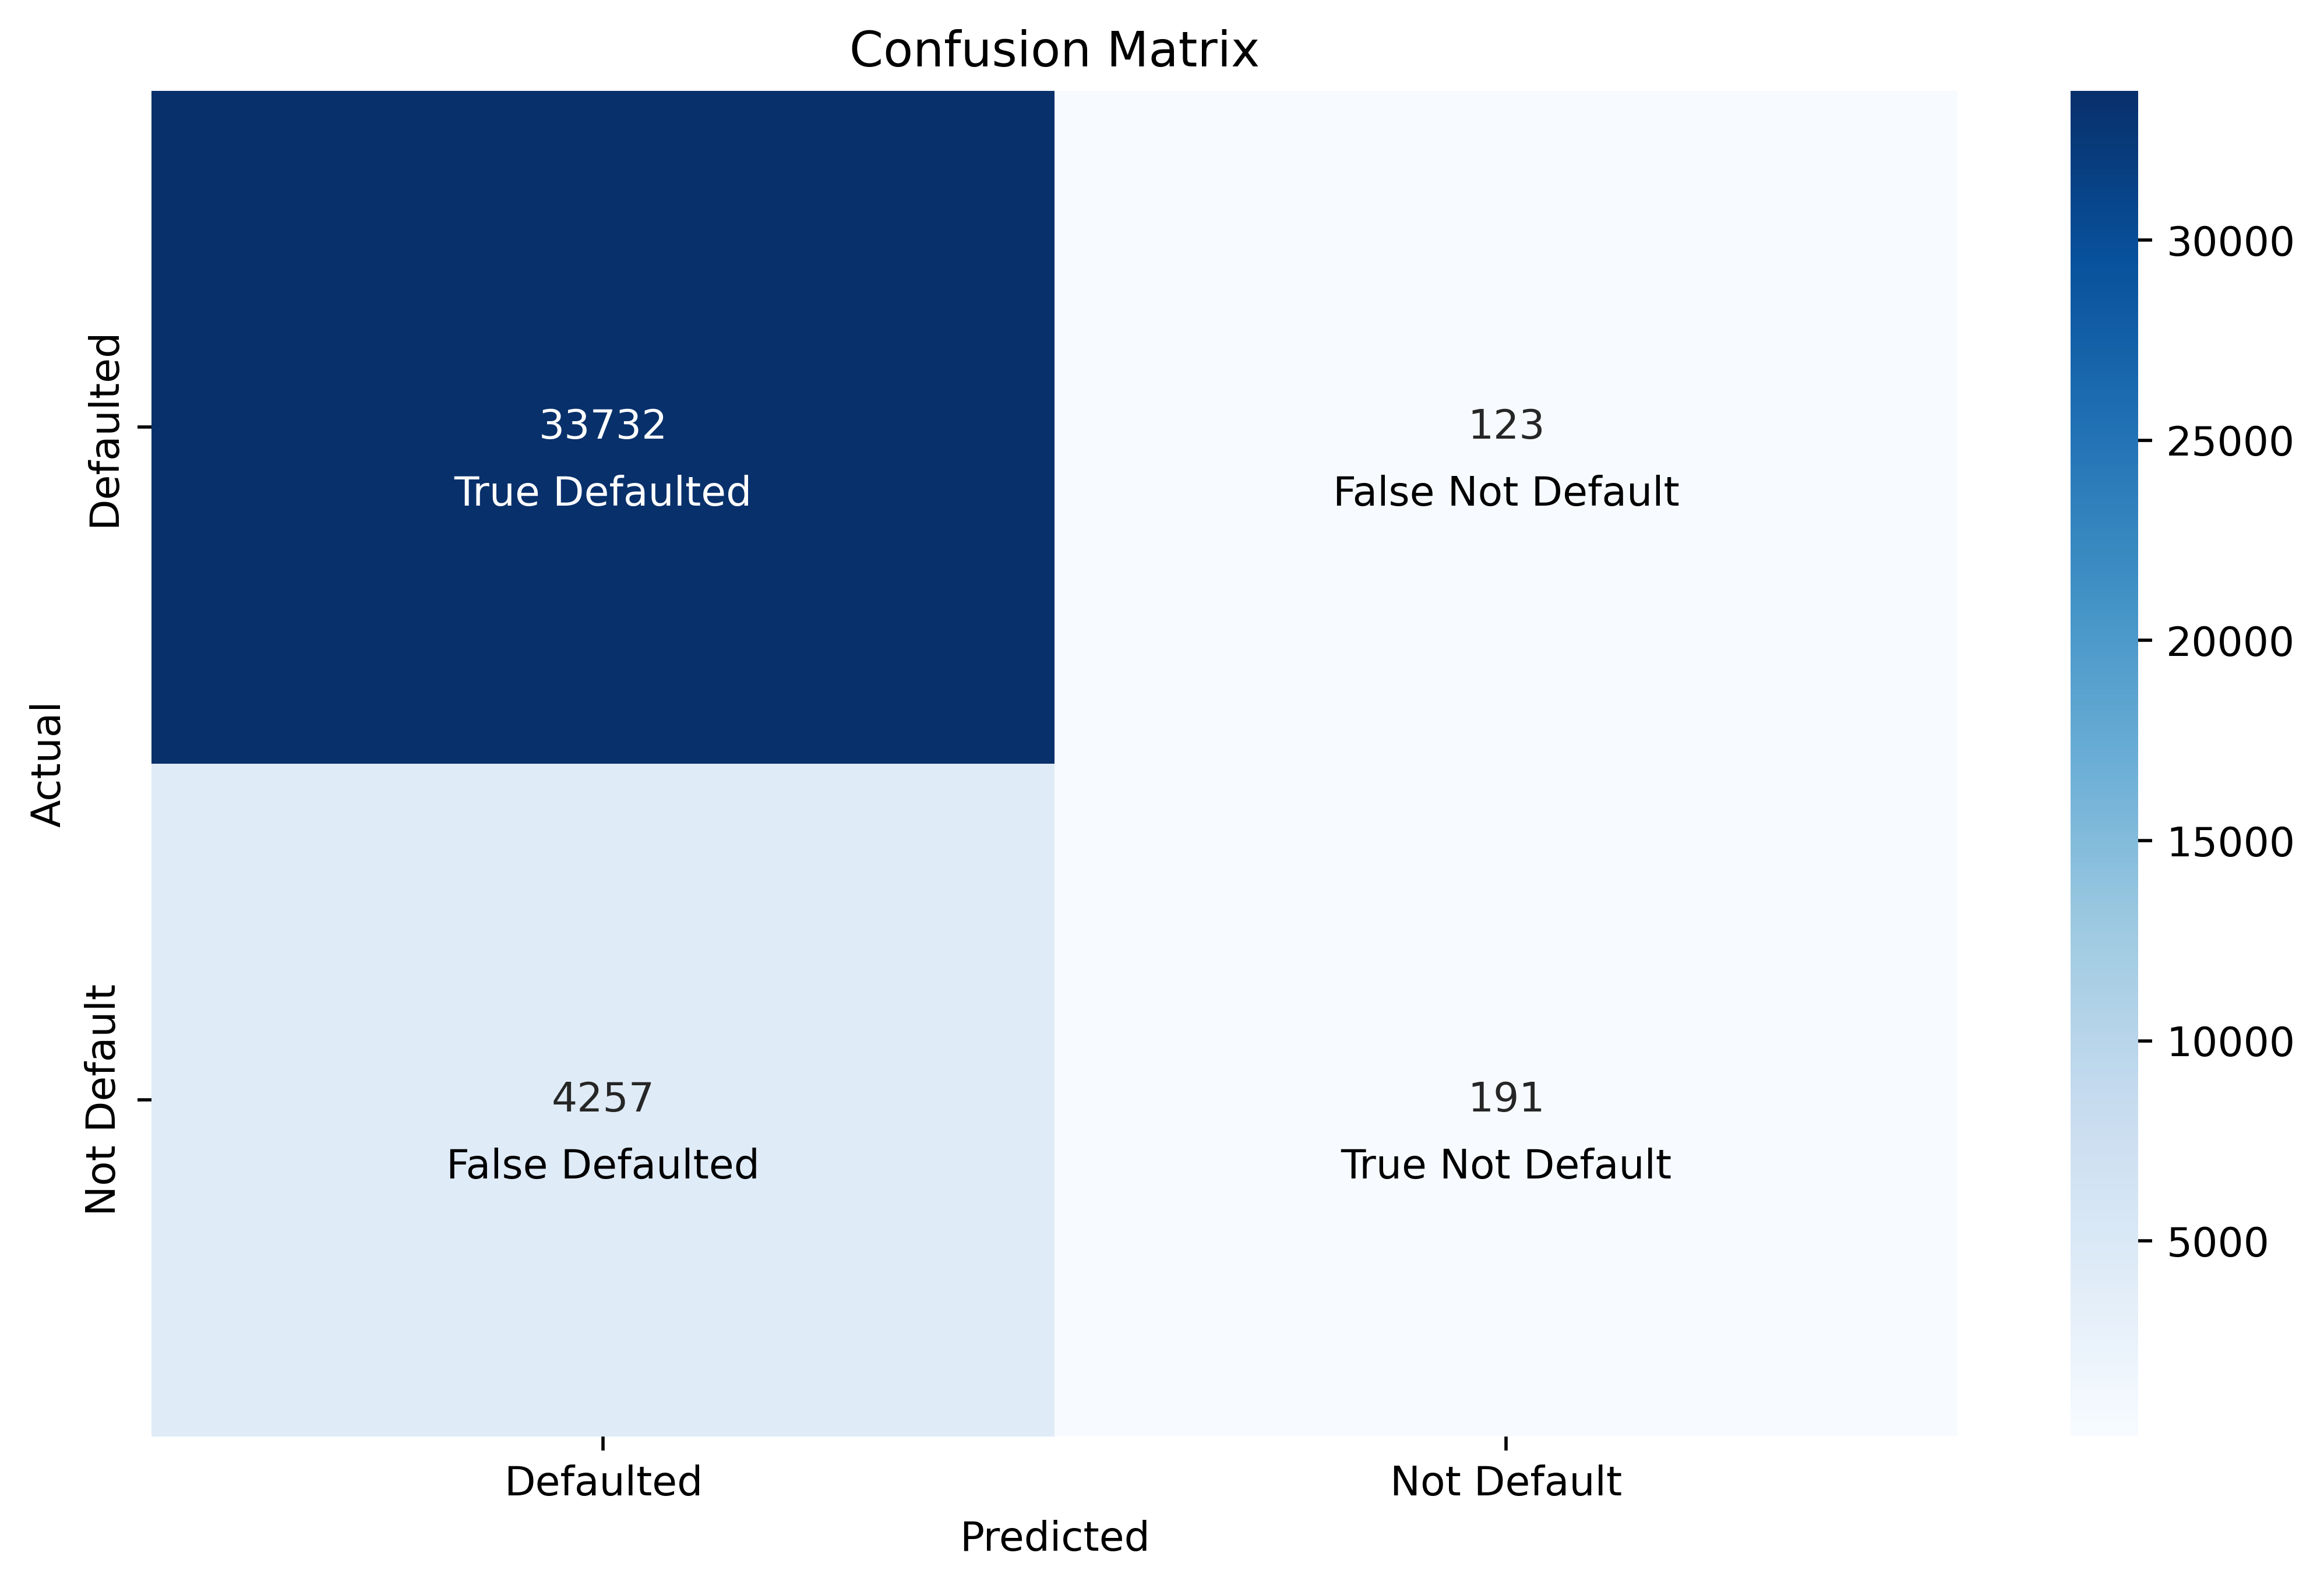

In [25]:
cm = confusion_matrix(y_valid, prediction_data_rf)
plt.figure(figsize=(10, 6), dpi=500)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
             xticklabels=['Defaulted', 'Not Default'], 
             yticklabels=['Defaulted', 'Not Default'])
plt.text(0.5, 0.6, 'True Defaulted', ha='center', va='center', color='white')
plt.text(1.5, 0.6, 'False Not Default', ha='center', va='center', color='black')
plt.text(0.5, 1.6, 'False Defaulted', ha='center', va='center', color='black')
plt.text(1.5, 1.6, 'True Not Default', ha='center', va='center', color='black')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [26]:
predicted_counts = pd.Series(prediction_data_rf).value_counts(normalize=True) * 100
predicted_counts.index = ['Defaulted', 'Not Default']
actual_distribution = {'Defaulted': 12, 'Not Default': 88}
comparison_df = pd.DataFrame({
    'Defaulted': predicted_counts,
    'Not Default': actual_distribution.values()
}, index=actual_distribution.keys())
print("\nPredicted vs Actual Stay Purpose:", comparison_df)


Predicted vs Actual Stay Purpose:              Defaulted  Not Default
Defaulted    99.180221           12
Not Default   0.819779           88


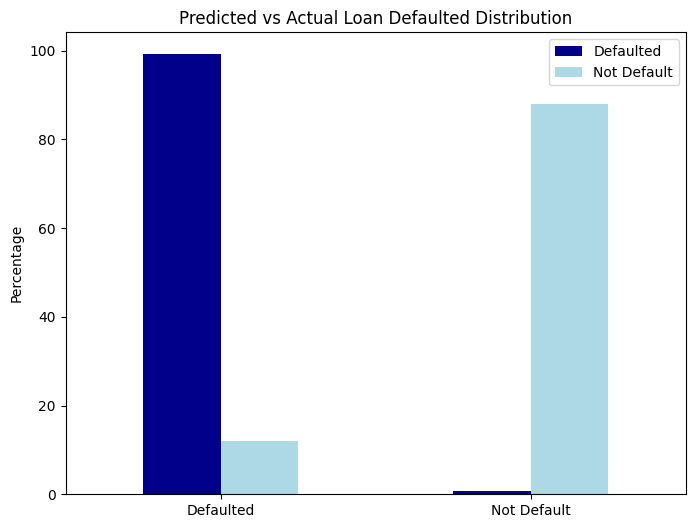

In [27]:
comparison_df.plot(kind='bar', figsize=(8, 6), color=['#00008B', '#ADD8E6'])
plt.title('Predicted vs Actual Loan Defaulted Distribution')
plt.ylabel('Percentage')
plt.xlabel('') 
plt.xticks(rotation=0)
plt.show()

Validation Accuracy: 0.886
ROC AUC Score on Validation Set: 0.726


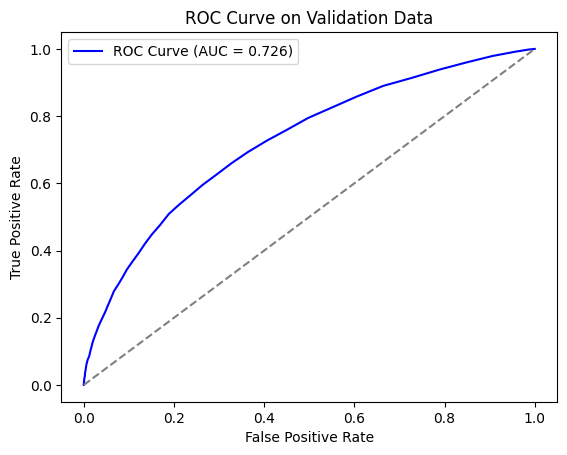

In [28]:
validation_accuracy = accuracy_score(y_valid, prediction_data_rf)
print("Validation Accuracy: {:.3f}".format(validation_accuracy))

predicted_probabilities = pipefinalrf.predict_proba(X_valid)[:, 1]  
roc_auc = roc_auc_score(y_valid, predicted_probabilities)
print("ROC AUC Score on Validation Set: {:.3f}".format(roc_auc))

fpr, tpr, _ = roc_curve(y_valid, predicted_probabilities)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Validation Data')
plt.legend()
plt.show()


## **Gradient Boosting Classification**

In [29]:
pipefinalgb = Pipeline(steps=[
    ('feature_engineering', FeatureEngineetingTransformer()),
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingClassifier(n_iter_no_change=5, validation_fraction=0.2, random_state=42))    
])

pipefinalgb.fit(X_train, y_train)
predictions_gb = pipefinalgb.predict(X_valid)

train_accuracy_gb = accuracy_score(y_train, pipefinalgb.predict(X_train))
test_accuracy_gb = accuracy_score(y_valid, predictions_gb)

print("Training accuracy: {:.3f}".format(train_accuracy_gb))
print("Test accuracy: {:.3f}".format(test_accuracy_gb))

if train_accuracy_gb < test_accuracy_gb:
    print("Underfitting: The model may be too simple for the data.")
elif train_accuracy_gb > test_accuracy_gb:
    print("Overfitting: The model may be overfitting to the training data.")
else:
    print("Good fit: The model seems to generalize well.")

predictions_on_test_set_gb = pipefinalgb.predict(X_test)

Training accuracy: 0.887
Test accuracy: 0.887
Overfitting: The model may be overfitting to the training data.


In [30]:
print("Classification report:", classification_report(y_valid, predictions_gb))

Classification report:               precision    recall  f1-score   support

           0       0.89      1.00      0.94     33855
           1       0.64      0.06      0.10      4448

    accuracy                           0.89     38303
   macro avg       0.77      0.53      0.52     38303
weighted avg       0.86      0.89      0.84     38303



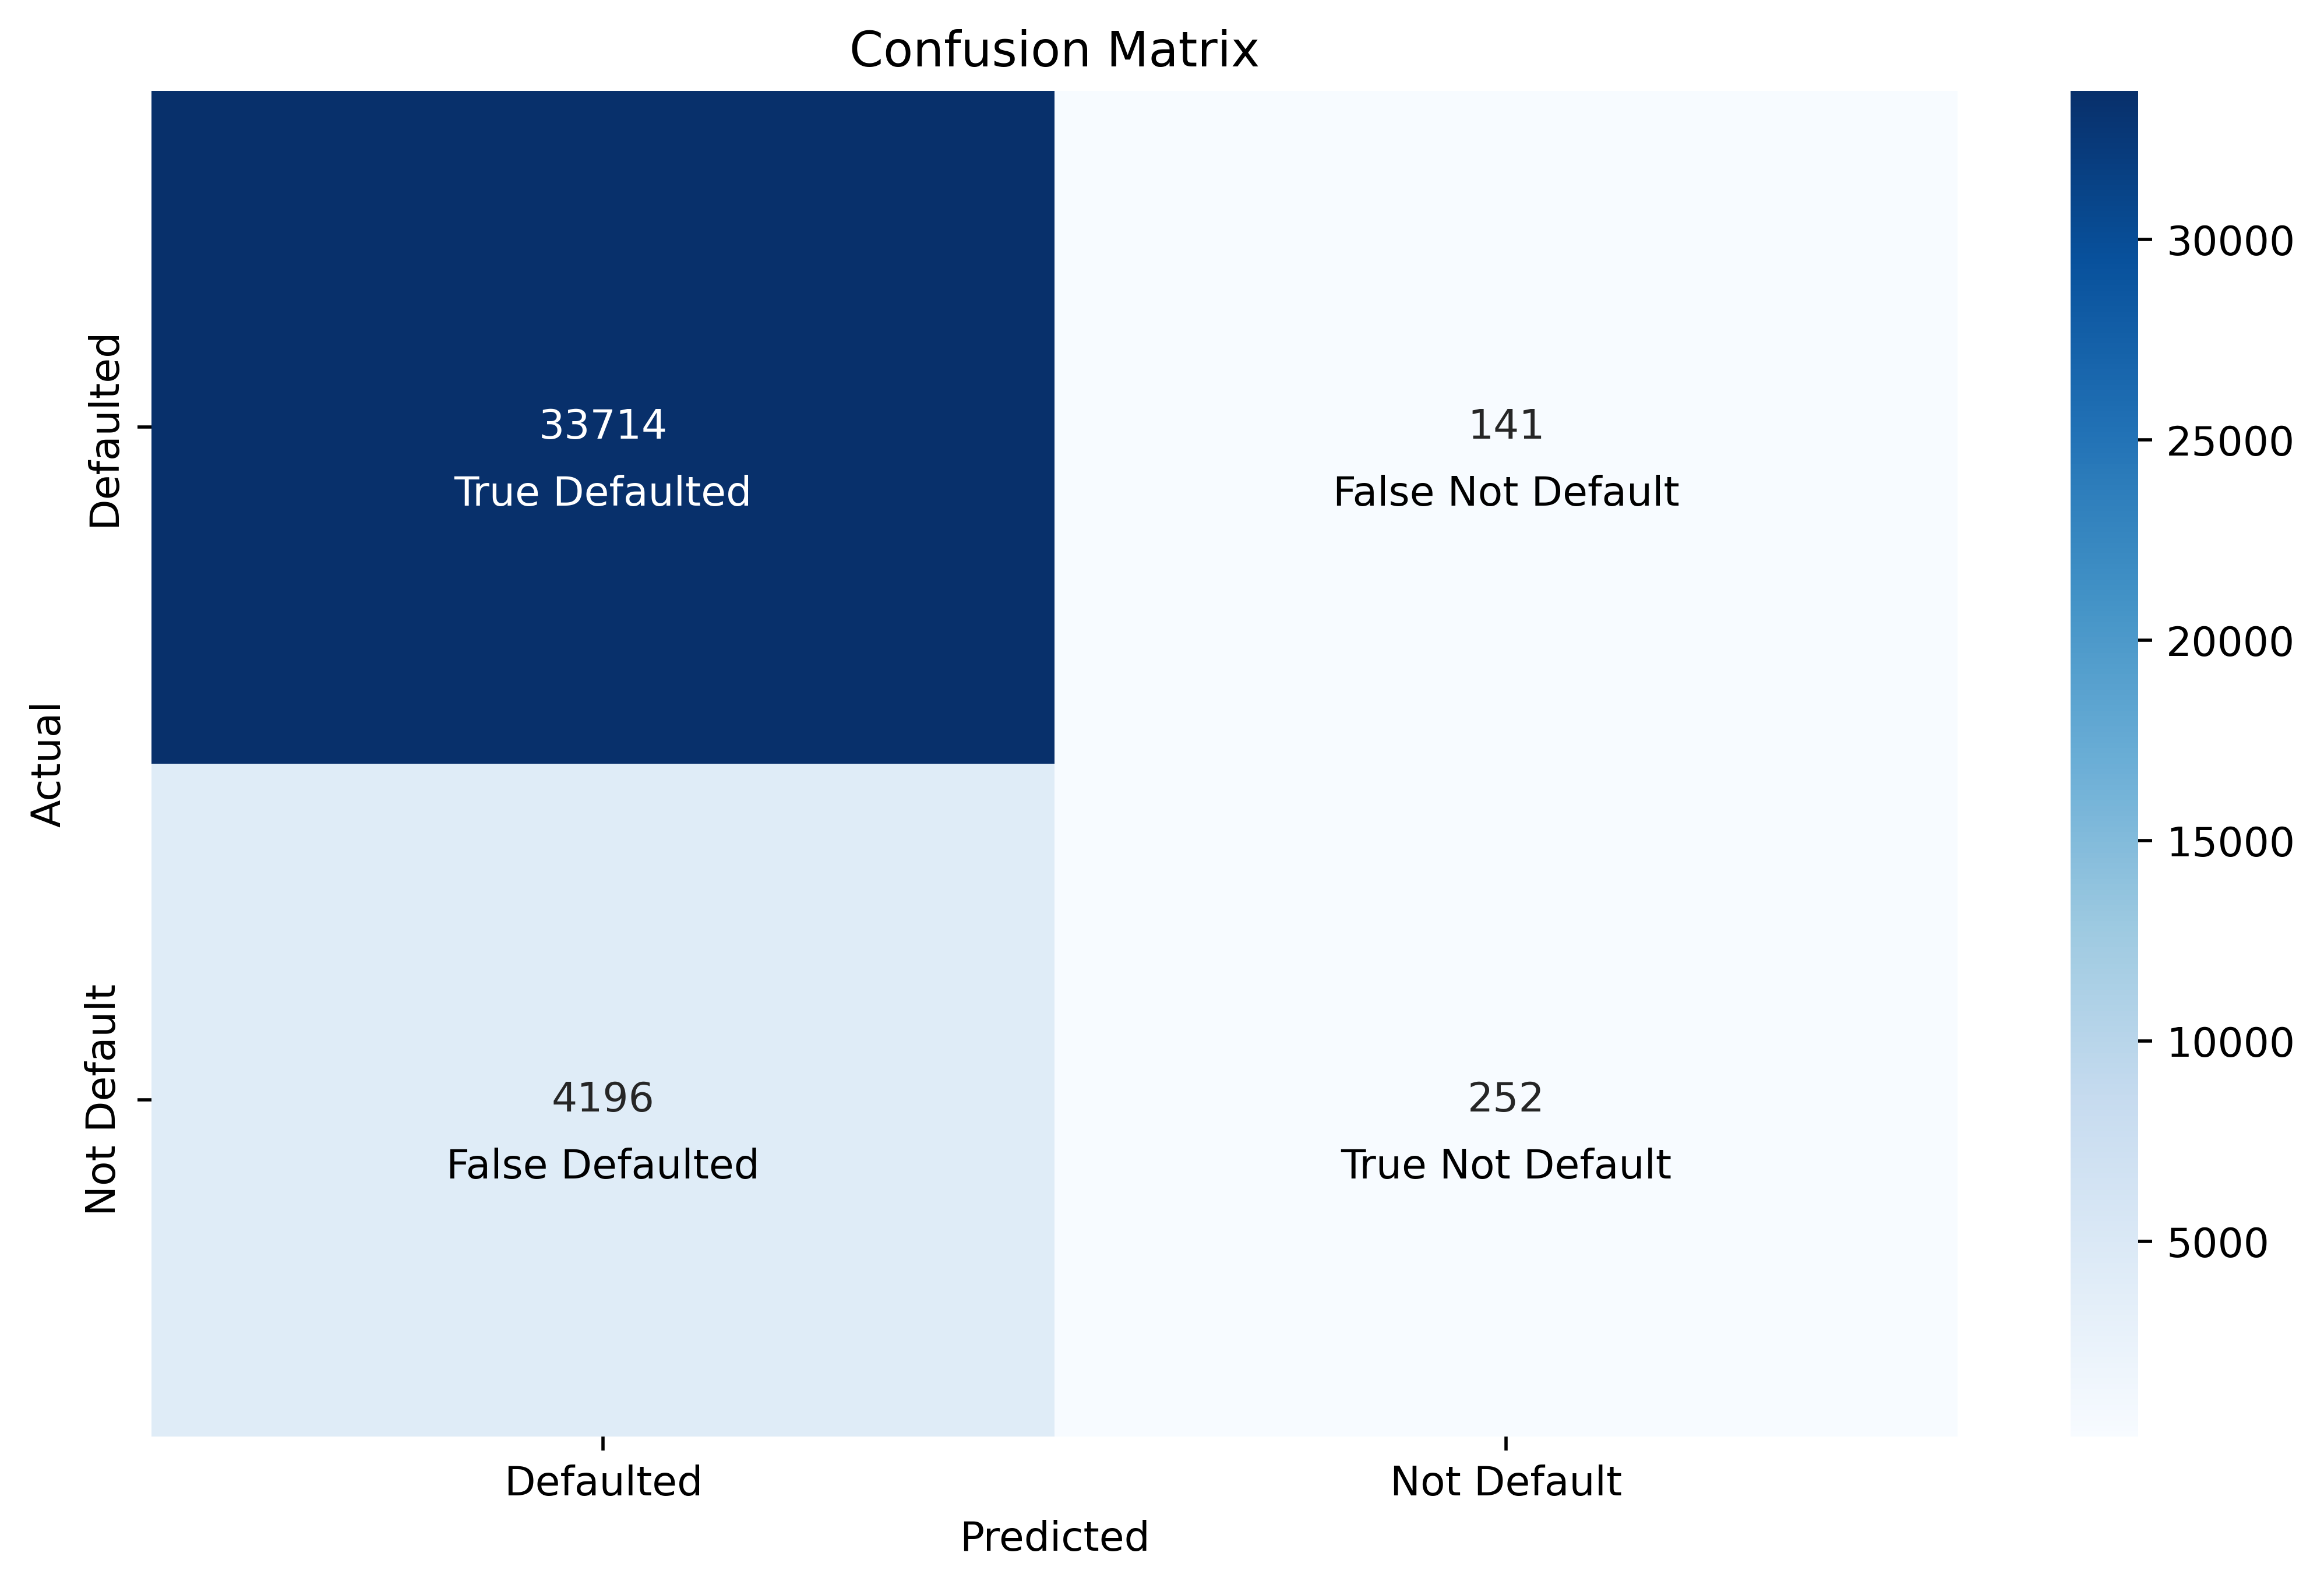

In [31]:
cm = confusion_matrix(y_valid, predictions_gb)
plt.figure(figsize=(10, 6), dpi=500)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
             xticklabels=['Defaulted', 'Not Default'], 
             yticklabels=['Defaulted', 'Not Default'])
plt.text(0.5, 0.6, 'True Defaulted', ha='center', va='center', color='white')
plt.text(1.5, 0.6, 'False Not Default', ha='center', va='center', color='black')
plt.text(0.5, 1.6, 'False Defaulted', ha='center', va='center', color='black')
plt.text(1.5, 1.6, 'True Not Default', ha='center', va='center', color='black')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [32]:
predicted_counts = pd.Series(predictions_gb).value_counts(normalize=True) * 100
predicted_counts.index = ['Defaulted', 'Not Default']
actual_distribution = {'Defaulted': 12, 'Not Default': 88}
comparison_df = pd.DataFrame({
    'Predicted': predicted_counts,
    'Actual': actual_distribution.values()
}, index=actual_distribution.keys())
print("\nPredicted vs Actual Stay Purpose:", comparison_df)


Predicted vs Actual Stay Purpose:              Predicted  Actual
Defaulted    98.973971      12
Not Default   1.026029      88


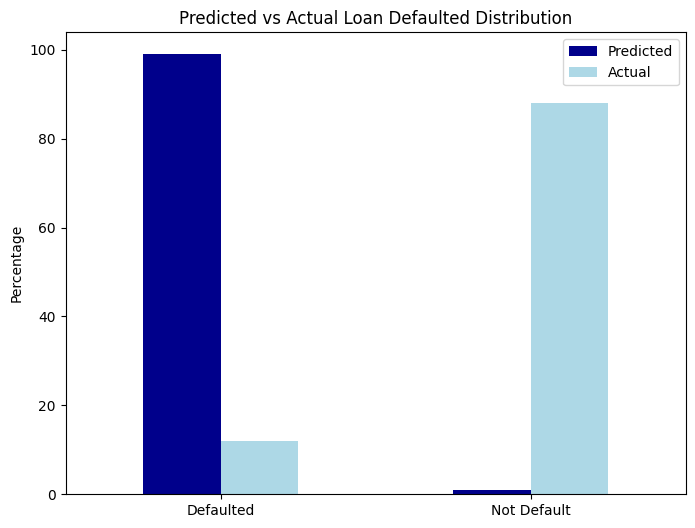

In [33]:
comparison_df.plot(kind='bar', figsize=(8, 6), color=['#00008B', '#ADD8E6'])
plt.title('Predicted vs Actual Loan Defaulted Distribution')
plt.ylabel('Percentage')
plt.xlabel('') 
plt.xticks(rotation=0)
plt.show()

Validation Accuracy: 0.887
ROC AUC Score on Validation Set: 0.749


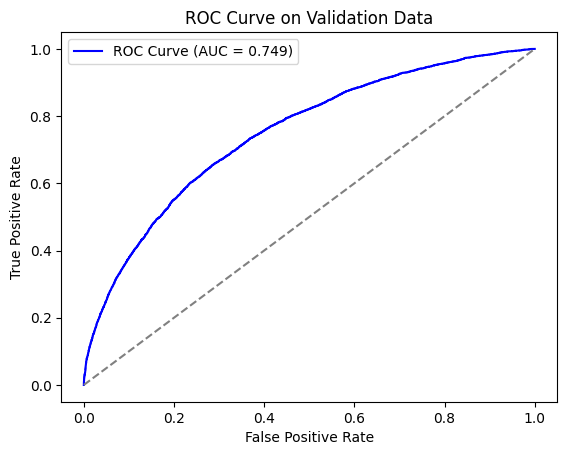

In [34]:
validation_accuracy = accuracy_score(y_valid, predictions_gb)
print("Validation Accuracy: {:.3f}".format(validation_accuracy))

predicted_probabilities = pipefinalgb.predict_proba(X_valid)[:, 1]  
roc_auc = roc_auc_score(y_valid, predicted_probabilities)
print("ROC AUC Score on Validation Set: {:.3f}".format(roc_auc))

fpr, tpr, _ = roc_curve(y_valid, predicted_probabilities)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Validation Data')
plt.legend()
plt.show()


## **XGBClassifier**

In [35]:

pipefinalxgb = Pipeline(steps=[
    ('feature_engineering', FeatureEngineetingTransformer()),
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(objective='binary:logistic', random_state=42))
])

pipefinalxgb.fit(X_train, y_train)
predictions_xgb = pipefinalxgb.predict(X_valid)

train_accuracy_xgb = accuracy_score(y_train, pipefinalxgb.predict(X_train))
test_accuracy_xgb = accuracy_score(y_valid, predictions_xgb)

print("Training accuracy: {:.3f}".format(train_accuracy_xgb))
print("Test accuracy: {:.3f}".format(test_accuracy_xgb))

if train_accuracy_xgb < test_accuracy_xgb:
    print("Underfitting: The model may be too simple for the data.")
elif train_accuracy_xgb > test_accuracy_xgb:
    print("Overfitting: The model may be overfitting to the training data.")
else:
    print("Good fit: The model seems to generalize well.")

predictions_on_test_set_xgb = pipefinalxgb.predict(X_test)

Training accuracy: 0.894
Test accuracy: 0.886
Overfitting: The model may be overfitting to the training data.


In [36]:
print("Classification report:", classification_report(y_valid, predictions_xgb))

Classification report:               precision    recall  f1-score   support

           0       0.89      0.99      0.94     33855
           1       0.56      0.07      0.13      4448

    accuracy                           0.89     38303
   macro avg       0.73      0.53      0.53     38303
weighted avg       0.85      0.89      0.85     38303



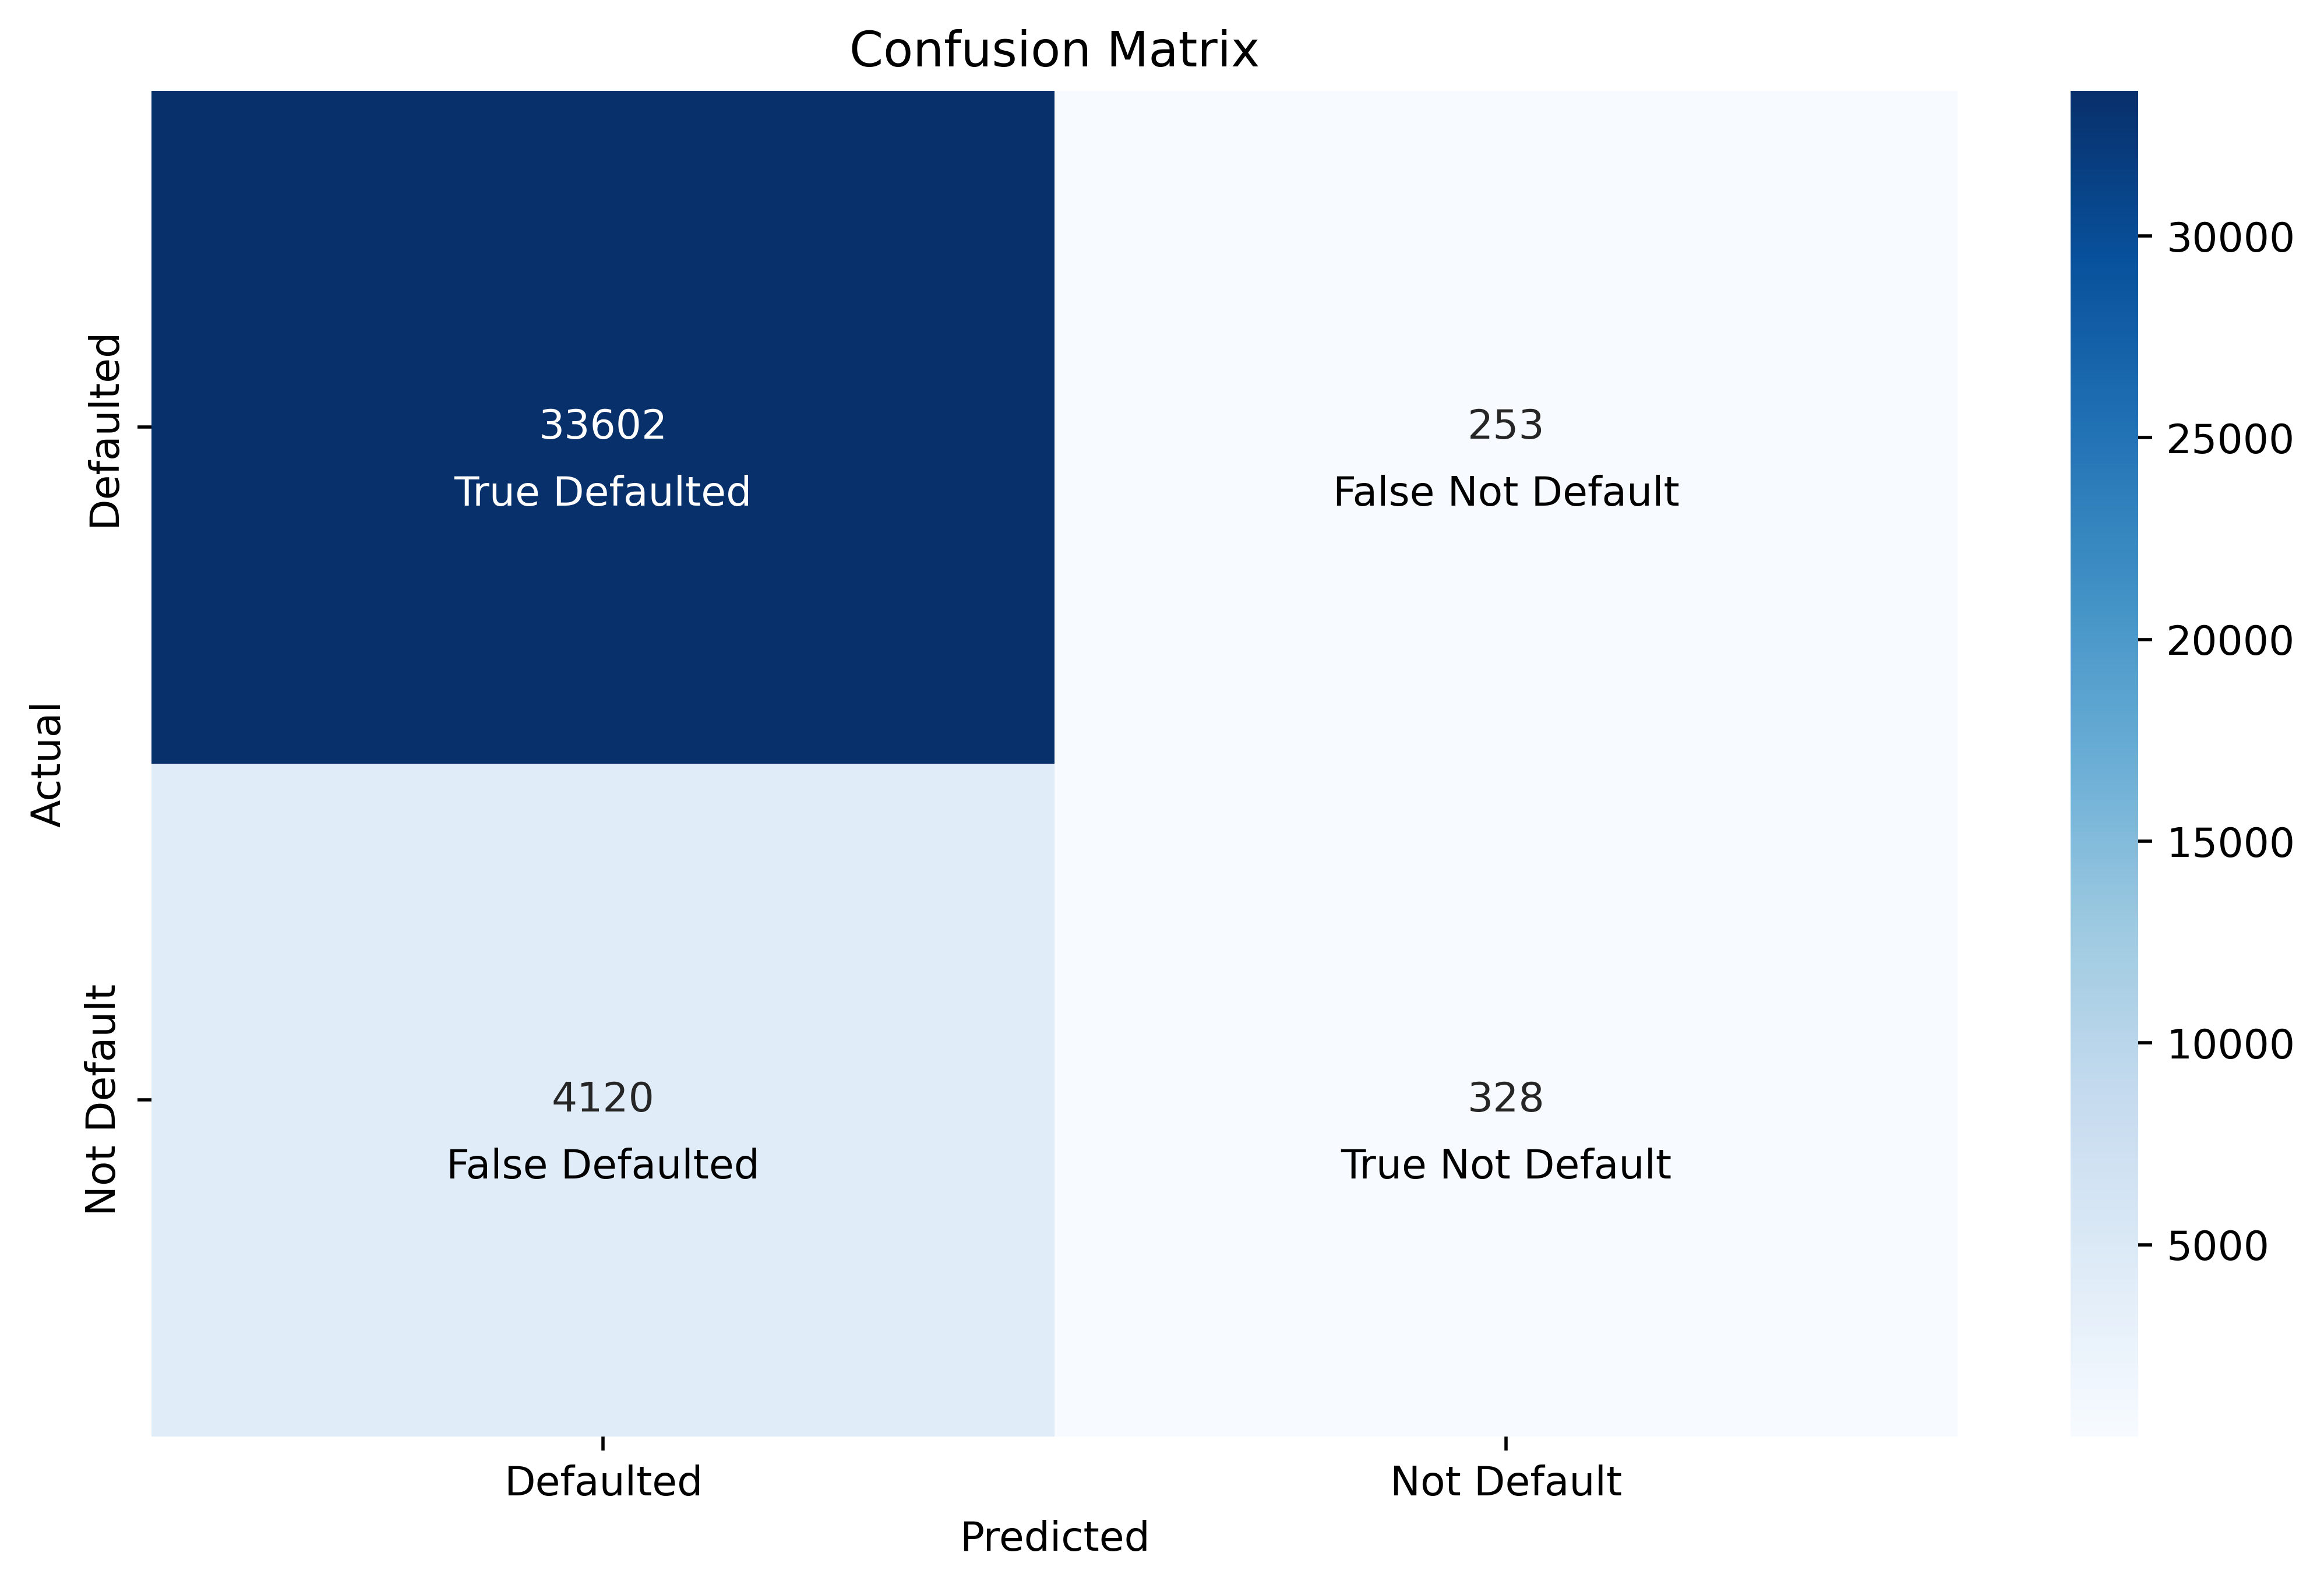

In [37]:
cm = confusion_matrix(y_valid, predictions_xgb)
plt.figure(figsize=(10, 6), dpi=500)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
             xticklabels=['Defaulted', 'Not Default'], 
             yticklabels=['Defaulted', 'Not Default'])
plt.text(0.5, 0.6, 'True Defaulted', ha='center', va='center', color='white')
plt.text(1.5, 0.6, 'False Not Default', ha='center', va='center', color='black')
plt.text(0.5, 1.6, 'False Defaulted', ha='center', va='center', color='black')
plt.text(1.5, 1.6, 'True Not Default', ha='center', va='center', color='black')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [38]:
predicted_counts = pd.Series(predictions_xgb).value_counts(normalize=True) * 100
predicted_counts.index = ['Defaulted', 'Not Default']
actual_distribution = {'Defaulted': 12, 'Not Default': 88}
comparison_df = pd.DataFrame({
    'Predicted': predicted_counts,
    'Actual': actual_distribution.values()
}, index=actual_distribution.keys())
print("\nPredicted vs Actual Stay Purpose:", comparison_df)


Predicted vs Actual Stay Purpose:              Predicted  Actual
Defaulted    98.483148      12
Not Default   1.516852      88


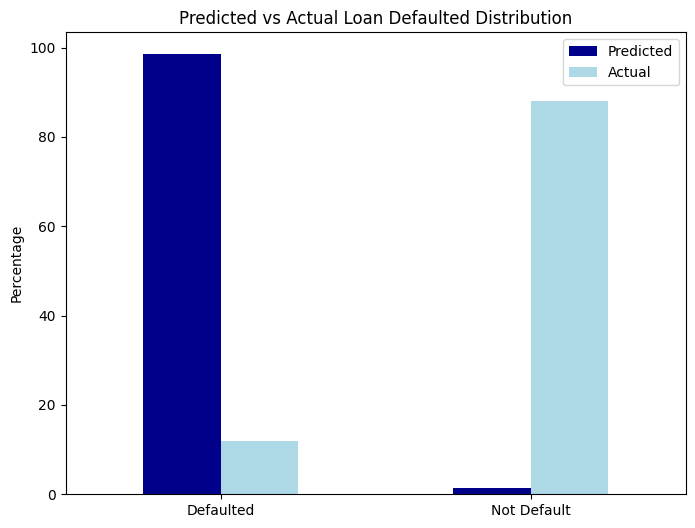

In [39]:
comparison_df.plot(kind='bar', figsize=(8, 6), color=['#00008B', '#ADD8E6'])
plt.title('Predicted vs Actual Loan Defaulted Distribution')
plt.ylabel('Percentage')
plt.xlabel('') 
plt.xticks(rotation=0)
plt.show()

Validation Accuracy: 0.886
ROC AUC Score on Validation Set: 0.739


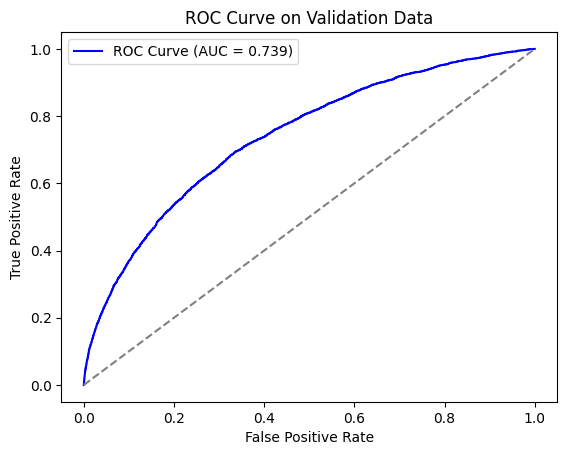

In [40]:
validation_accuracy = accuracy_score(y_valid, predictions_xgb)
print("Validation Accuracy: {:.3f}".format(validation_accuracy))

predicted_probabilities = pipefinalxgb.predict_proba(X_valid)[:, 1]  
roc_auc = roc_auc_score(y_valid, predicted_probabilities)
print("ROC AUC Score on Validation Set: {:.3f}".format(roc_auc))

fpr, tpr, _ = roc_curve(y_valid, predicted_probabilities)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Validation Data')
plt.legend()
plt.show()

